# Home Work

## Import files

In [1]:

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import mean_squared_error as mse, r2_score
from scipy.io import arff
import requests
from io import StringIO
import matplotlib.pyplot as plt


# The plot will have dark plot

In [2]:
#plt.style.use('dark_background')

# FIles are downloaded from car data set

In [3]:
url = "https://www.openml.org/data/download/43/dataset_43_haberman.arff"
response = requests.get(url)
data = response.text

In [4]:
with open("dataset_43_haberman.arff", "w") as file:
  file.write(data)

# Targer extracted

In [5]:
data, meta = arff.loadarff("dataset_43_haberman.arff")
df = pd.DataFrame(data)

# The Data

In [6]:
df

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30.0,b'64',1.0,b'1'
1,30.0,b'62',3.0,b'1'
2,30.0,b'65',0.0,b'1'
3,31.0,b'59',2.0,b'1'
4,31.0,b'65',4.0,b'1'
...,...,...,...,...
301,75.0,b'62',1.0,b'1'
302,76.0,b'67',0.0,b'1'
303,77.0,b'65',3.0,b'1'
304,78.0,b'65',1.0,b'2'


# Data Extraction

In [7]:
X = df.drop(columns=['Survival_status'])
y = df['Survival_status']

# Data is splited into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

#  Regularization - Ridge

In [12]:
ridge_model = Ridge(alpha=0.001, max_iter=1000000)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Polynomial

In [13]:
poly_model = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge_regression", Ridge(alpha=0.001, max_iter=1000000))
])
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)

In [14]:
scoring = {'R2': 'r2', '-MSE': 'neg_mean_squared_error', '-MAE': 'neg_mean_absolute_error', 'Max': 'max_error'}

def cross_validation_evaluation(model, X, y, scoring, cv_rule):
  scores = cross_validate(model, X, y, scoring=scoring, cv=cv_rule)
  print('Cross-Validation error')
  df_scores = pd.DataFrame(scores)
  display(df_scores)
  print('\n')
  print(df_scores.mean()[2:])

# Linear Model

In [15]:
print("Simple Linear Model Evaluation:")
cross_validation_evaluation(lr_model, X, y, scoring, ShuffleSplit(n_splits=5, random_state=42))

Simple Linear Model Evaluation:
Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002210,0.002831,-0.110291,-0.228759,-0.397611,-0.874599
1,0.001951,0.002212,-0.100690,-0.148897,-0.316896,-1.109942
2,0.002047,0.002665,0.210993,-0.151069,-0.339323,-0.743579
3,0.001888,0.002383,0.054434,-0.165302,-0.350624,-0.825174
4,0.001935,0.002347,-0.135339,-0.127593,-0.313764,-0.717370




test_R2     -0.016179
test_-MSE   -0.164324
test_-MAE   -0.343644
test_Max    -0.854133
dtype: float64


# Ridge Model

In [16]:
print("Ridge Model Evaluation:")
cross_validation_evaluation(ridge_model, X, y, scoring, ShuffleSplit(n_splits=5, random_state=42))

Ridge Model Evaluation:
Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002649,0.002142,-0.110291,-0.228759,-0.397611,-0.874599
1,0.001780,0.003408,-0.100690,-0.148897,-0.316896,-1.109942
2,0.002586,0.002553,0.210993,-0.151069,-0.339323,-0.743579
3,0.001792,0.001885,0.054434,-0.165302,-0.350624,-0.825174
4,0.001526,0.002344,-0.135339,-0.127593,-0.313764,-0.717370




test_R2     -0.016179
test_-MSE   -0.164324
test_-MAE   -0.343644
test_Max    -0.854133
dtype: float64


# Evaluate Polynomial Ridge model

In [17]:
cross_validation_evaluation(poly_model, X, y, scoring, ShuffleSplit(n_splits=5, random_state=42))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.004984,0.003293,-0.089020,-0.224377,-0.383373,-0.869737
1,0.003899,0.002772,0.142976,-0.115935,-0.294679,-0.792833
2,0.003589,0.002259,0.260498,-0.141590,-0.328020,-0.703413
3,0.004166,0.002653,-0.037224,-0.181325,-0.359368,-0.902162
4,0.003304,0.002421,0.042529,-0.107603,-0.263262,-0.695640




test_R2      0.063952
test_-MSE   -0.154166
test_-MAE   -0.325741
test_Max    -0.792757
dtype: float64


# Data Visulaization

In [18]:
def regression_results(y_true, y_predict, title):
  plt.figure(figsize=(15, 6))
  plt.plot(y_true, label='True Values', marker='x')
  plt.plot(y_predict, label='Predicted Values', marker='*')
  plt.grid(True)
  plt.title(title)
  plt.xlabel('Sample')
  plt.ylabel('Target Value')
  plt.legend()
  plt.show()

# Linear regression graph

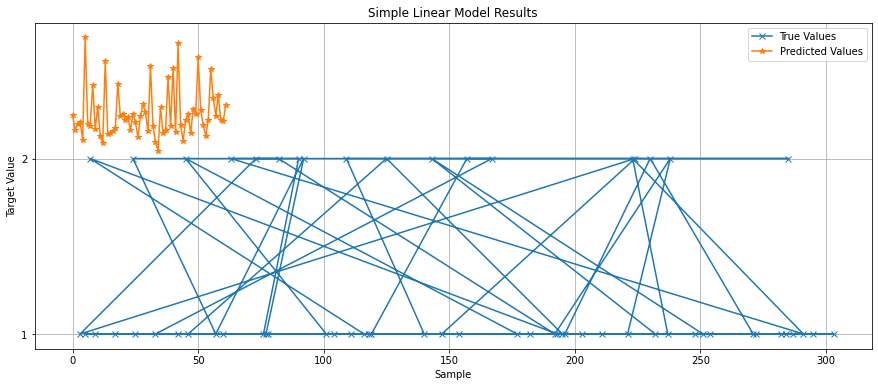

In [19]:
regression_results(y_test, lr_predictions, 'Simple Linear Model Results')

# Ridge graph

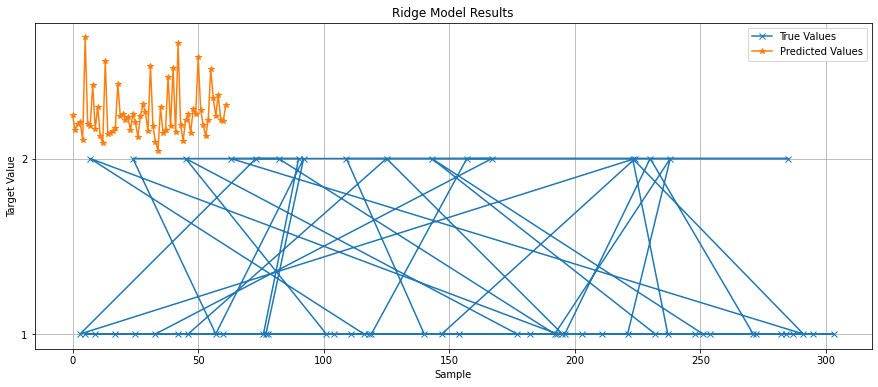

In [20]:
regression_results(y_test, ridge_predictions, 'Ridge Model Results')

# Polynomial Ridge Model graph

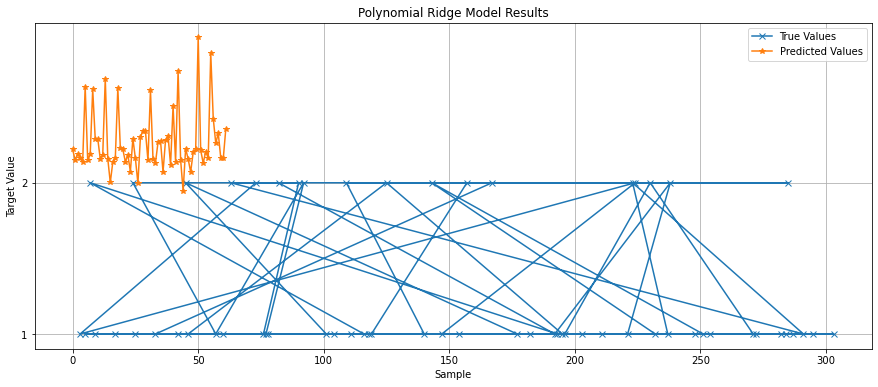

In [21]:
regression_results(y_test, poly_predictions, 'Polynomial Ridge Model Results')